<a href="https://colab.research.google.com/github/Rumesa15/R-project/blob/main/Weather_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.INTRODUCTION

This project focuses on predicting hourly precipitation using the National Oceanic and Atmospheric Administration (NOAA) dataset. Accurate precipitation forecasts are vital for sectors like agriculture and disaster management. By analyzing historical weather data, including temperature, humidity, and wind speed, we aim to identify patterns that influence rainfall.

We will employ various machine learning techniques to develop a model that enhances forecast accuracy. This initiative not only aims to improve predictive capabilities but also seeks to provide practical tools for better decision-making in weather-sensitive industries.





** NOAA Weather Dataset - JFK Airport (New York)**

**PROBLEM** =  To predict the precipitation using some of the available features

1

# IMPORTING REQUIRED MODULES

In [ ]:
we need to install the following libraries to assist with data manipulation, modeling, and visualization:

tidyverse: This includes essential packages like ggplot2 for data visualization and dplyr for data manipulation.
tidymodels: This framework helps streamline the process of building and evaluating machine learning models.

In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tidymodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


After sourcing the required dataset, we proceeded to download and unzip the files to prepare for analysis. The dataset, which contains comprehensive meteorological information from the National Oceanic and Atmospheric Administration (NOAA), is essential for our project on hourly precipitation prediction.

In [ ]:
url <- 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'
download.file(url, destfile = "lax_to_jfk.tar.gz")

Unzipping the files allows us to access the raw data in a structured format, enabling us to explore and manipulate it effectively. This step is crucial, as it ensures that we can seamlessly integrate the data into our analysis workflow. With the dataset ready, we can now begin our process of data cleaning, transformation, and modeling to uncover patterns and relationships that will inform our predictive models.

In [ ]:
untar("lax_to_jfk.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”


To load the dataset into R for analysis, we use the read_csv() function from the tidyverse package. This function allows us to efficiently read the CSV file and convert it into a data frame.



In [ ]:
Weather_data <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv",
                          col_types = cols('HOURLYPrecip'= col_number(),
                                         'HOURLYWindSpeed' = col_number()))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


# DATA PREPROCESSING

After executing the command to read the file, we can inspect the data by using the head() function, which displays the first few rows. This initial examination helps us understand the structure and contents of the dataset, allowing us to identify key variables relevant to our project on hourly precipitation prediction. With the data successfully imported, we can proceed with data cleaning, transformation, and modeling to extract meaningful insights.

In [ ]:
head(Weather_data , n=10)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,NA,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92
2014-03-01 02:51:00,4,51,19,15,0.00,0,30.42,30.40
2014-02-12 21:51:00,14,65,24,21,0.00,11,30.37,30.35
2014-10-11 09:51:00,51,90,54,52,0.06,11,30.05,30.03


In [ ]:
glimpse(Weather_data)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, NA, 0.00, 0.00, 0.00, 0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


he dim() function in R is used to obtain the dimensions of a data frame or matrix, providing essential information about its structure. When applied to our dataset, dim() returns two values: the number of rows and the number of columns.

This function is particularly useful for quickly assessing the size of the dataset, which helps us understand the amount of data available for analysis. By knowing the dimensions, we can determine whether the dataset is sufficiently large for our modeling purposes and identify how many features (variables) we have to work with. This initial insight is crucial as we prepare for further data exploration and manipulation in our project on hourly precipitation prediction.





In [ ]:
dim(Weather_data)

[1] 5727    9

In [ ]:
str(Weather_data)

spc_tbl_ [5,727 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DATE                  : POSIXct[1:5727], format: "2015-07-25 13:51:00" "2016-11-18 23:51:00" ...
 $ HOURLYDewPointTempF   : num [1:5727] 60 34 33 18 27 35 4 14 51 71 ...
 $ HOURLYRelativeHumidity: num [1:5727] 46 48 89 48 61 79 51 65 90 94 ...
 $ HOURLYDRYBULBTEMPF    : num [1:5727] 83 53 36 36 39 41 19 24 54 73 ...
 $ HOURLYWETBULBTEMPF    : num [1:5727] 68 44 35 30 34 38 15 21 52 72 ...
 $ HOURLYPrecip          : num [1:5727] 0 0 0 0 NA 0 0 0 0.06 NA ...
 $ HOURLYWindSpeed       : num [1:5727] 13 6 13 14 11 6 0 11 11 5 ...
 $ HOURLYSeaLevelPressure: num [1:5727] 30 30.1 30.1 29.8 NA ...
 $ HOURLYStationPressure : num [1:5727] 30 30 30.1 29.8 30.5 ...
 - attr(*, "spec")=
  .. cols(
  ..   DATE = col_datetime(format = ""),
  ..   HOURLYDewPointTempF = col_double(),
  ..   HOURLYRelativeHumidity = col_double(),
  ..   HOURLYDRYBULBTEMPF = col_double(),
  ..   HOURLYWETBULBTEMPF = col_double(),
  ..   HOURLYPrecip = col_numb

To focus our analysis on relevant aspects of the dataset, we will select specific features that are crucial for our hourly precipitation prediction model. By identifying and extracting these features, we create a streamlined data frame that contains only the necessary variables.

This process involves using functions like select() from the dplyr package to filter out unneeded columns. The resulting data frame will enable us to perform more efficient analysis and modeling, ensuring that our efforts are directed toward the most informative attributes that influence precipitation patterns. This targeted approach is essential for building a robust predictive model.





In [ ]:
key_columns<- Weather_data %>%
select(HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure)

In [ ]:
head(key_columns , n=10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,NA,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


In [ ]:
unique(key_columns$HOURLYPrecip)

[1] 0.00   NA 0.06 0.03 0.02 0.08 0.01 0.07 0.16 0.09 0.22 0.24 0.18 0.05 0.04
[16] 0.11 0.14 0.25 0.10 0.58 0.12 0.13 0.46 1.07 1.19 0.34 0.20 0.36 0.42 0.17
[31] 0.27 0.35 0.31 0.33 0.23 0.26 0.28 0.75 0.19 0.54 0.59 0.21

In [ ]:
library(stringr)
library(tidyverse)

Replacing the values wchich is not integer form

In [ ]:
df_replace <- key_columns %>%
  mutate( HOURLYPrecip = str_replace(HOURLYPrecip , "T","0.00"),
HOURLYPrecip = str_remove(HOURLYPrecip , "s$"))

unique(df_replace$HOURLYPrecip)


[1] "0"    NA     "0.06" "0.03" "0.02" "0.08" "0.01" "0.07" "0.16" "0.09"
[11] "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.1"  "0.58"
[21] "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.2"  "0.36" "0.42" "0.17"
[31] "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19" "0.54"
[41] "0.59" "0.21"

In [ ]:
glimpse(key_columns)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, NA, 0.00, 0.00, 0.00, 0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [ ]:
glimpse(df_convert)

 num [1:5727] 83 53 36 36 39 41 19 24 54 73 ...


In [ ]:
exists("key_columns")

[1] TRUE

In [ ]:
names(key_columns)

[1] "HOURLYRelativeHumidity" "HOURLYDRYBULBTEMPF"     "HOURLYPrecip"          
[4] "HOURLYWindSpeed"        "HOURLYStationPressure"

Renameing the data columns

In [ ]:
 data_columns <- key_columns %>%
     rename(relative_humidity = HOURLYRelativeHumidity ,
       dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
       precip =HOURLYPrecip,
       wind_speed = HOURLYWindSpeed)

To ensure optimal performance of our machine learning models, we will convert the relevant data columns from double to numeric format. While both data types represent numbers, converting to numeric helps eliminate any potential precision issues and ensures compatibility with various modeling algorithms. This conversion is crucial, as machine learning models require well-defined numeric inputs to accurately learn patterns and make predictions. By standardizing our data types, we enhance the reliability and efficiency of our analysis.

In [ ]:
df_convert <- as.data.frame(lapply(key_columns , as.numeric))

In [ ]:
str(df_convert)

'data.frame':	5727 obs. of  5 variables:
 $ HOURLYRelativeHumidity: num  46 48 89 48 61 79 51 65 90 94 ...
 $ HOURLYDRYBULBTEMPF    : num  83 53 36 36 39 41 19 24 54 73 ...
 $ HOURLYPrecip          : num  0 0 0 0 NA 0 0 0 0.06 NA ...
 $ HOURLYWindSpeed       : num  13 6 13 14 11 6 0 11 11 5 ...
 $ HOURLYStationPressure : num  30 30 30.1 29.8 30.5 ...


In [ ]:
str(key_columns)

tibble [5,727 × 5] (S3: tbl_df/tbl/data.frame)
 $ HOURLYRelativeHumidity: num [1:5727] 46 48 89 48 61 79 51 65 90 94 ...
 $ HOURLYDRYBULBTEMPF    : num [1:5727] 83 53 36 36 39 41 19 24 54 73 ...
 $ HOURLYPrecip          : num [1:5727] 0 0 0 0 NA 0 0 0 0.06 NA ...
 $ HOURLYWindSpeed       : num [1:5727] 13 6 13 14 11 6 0 11 11 5 ...
 $ HOURLYStationPressure : num [1:5727] 30 30 30.1 29.8 30.5 ...


#DATA SPLIT

To evaluate the performance of our machine learning models, we will split the dataset into training and testing sets. Specifically, we will allocate 80% of the data for training, which will be used to build and tune the model, while the remaining 20% will serve as the test data to assess the model's accuracy and generalization ability. This approach ensures that we can effectively validate the model's performance on unseen data, helping us gauge its reliability in making predictions on future observations.

In [ ]:
set.seed(1234)
data_split <- initial_split(key_columns, prop= 0.8)
train_data<-training (data_split)
test_data<- testing(data_split)

In [ ]:
library(ggplot2)

In [ ]:
colnames(train_data)

[1] "HOURLYRelativeHumidity" "HOURLYDRYBULBTEMPF"     "HOURLYPrecip"          
[4] "HOURLYWindSpeed"        "HOURLYStationPressure"

**DATA VISUALIZATION**

creating the visualisations for each column in a dataframe for better understaning of data

1.relative_humidity:
Histogram of relative humidity

In [ ]:
library(ggplot2)

Warning message in geom_histogram(bandwith = 1, fill = "pink", color = "black"):
“Ignoring unknown parameters: `bandwith`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 114 rows containing non-finite outside the scale range (`stat_bin()`).”


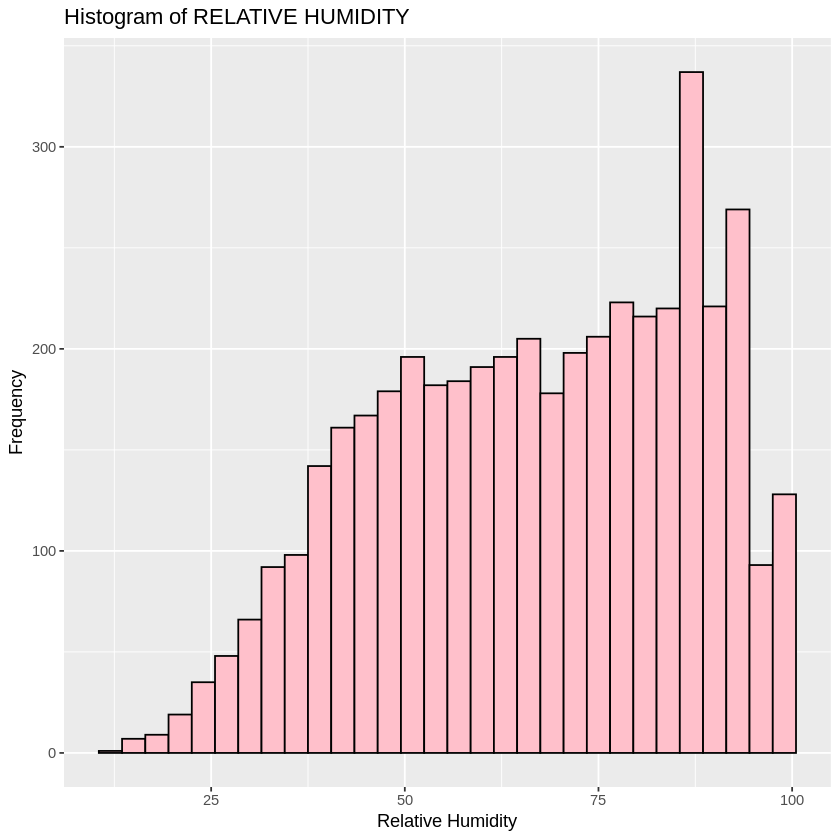

In [ ]:
ggplot(train_data,aes(x= HOURLYRelativeHumidity))+ geom_histogram( bandwith = 1,fill="pink",color="black")+
  labs(title = "Histogram of RELATIVE HUMIDITY" , x="Relative Humidity" , y="Frequency")

The histogram shows that higher relative humidity values are more frequent with range.There's a noticeable skew towards higher humidity levels, indicating their prevalance

2. DRY BULB TEMPERTURE:
boxplot for dry _bulb_temp

Warning message:
“Removed 114 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


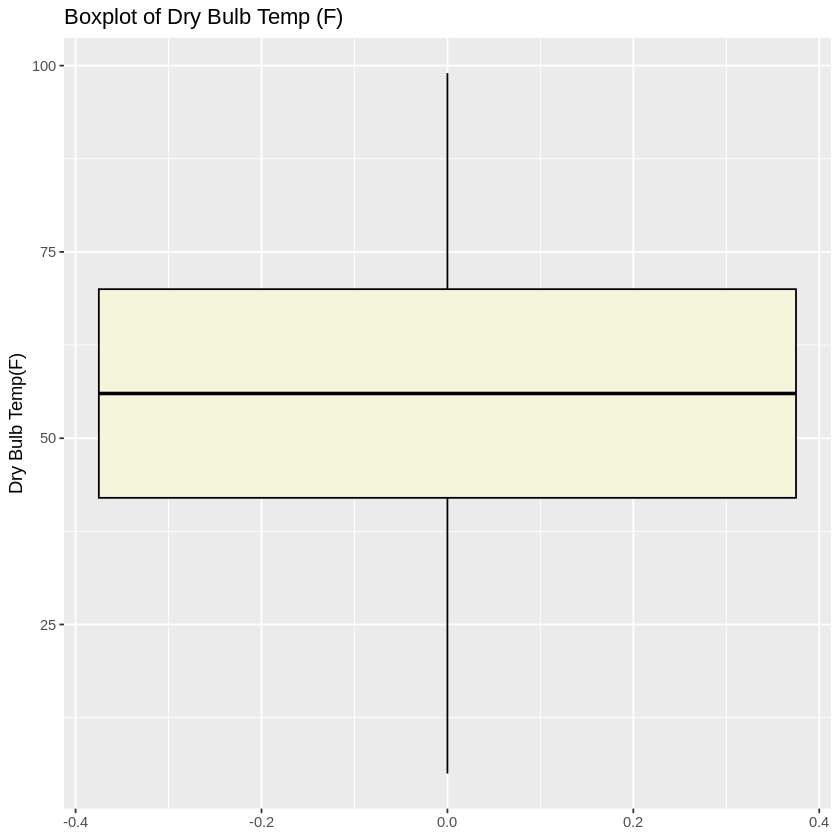

In [ ]:
ggplot(train_data , aes(y =HOURLYDRYBULBTEMPF))+ geom_boxplot(fill= "beige ", color="black")+
  labs(title = "Boxplot of Dry Bulb Temp (F)",y="Dry Bulb Temp(F)")

This BoxPlot displays the dry bulb temperatures , highlighting a median around 75 degreeF and an IQR between approximately 72 degreeF and 78 degree F . There is a notable outlier above the upper whisker indicating occasional extreme temperature reading

3.HOURLY Precip:
Histogram for precip

Warning message:
“Removed 1655 rows containing non-finite outside the scale range (`stat_bin()`).”


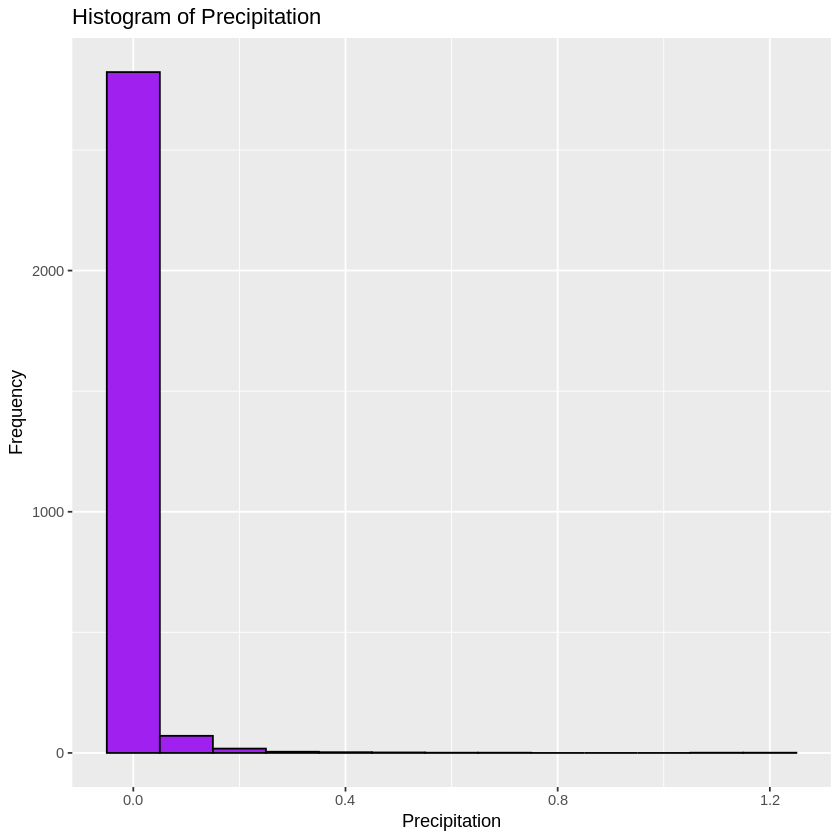

In [ ]:
ggplot(train_data , aes( x=HOURLYPrecip))+geom_histogram(binwidth =  0.1,fill="purple",color="black")+
  labs(title= "Histogram of Precipitation",x="Precipitation",y="Frequency")

The above histogram shows that higher reative humidity values are more frequent with most observations falling within the normal range . There's a noticeable skew towards higher humidity levels, indicating their prevalence

4.Wind Speed:
Boxplot of wind speed

Warning message:
“Removed 119 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


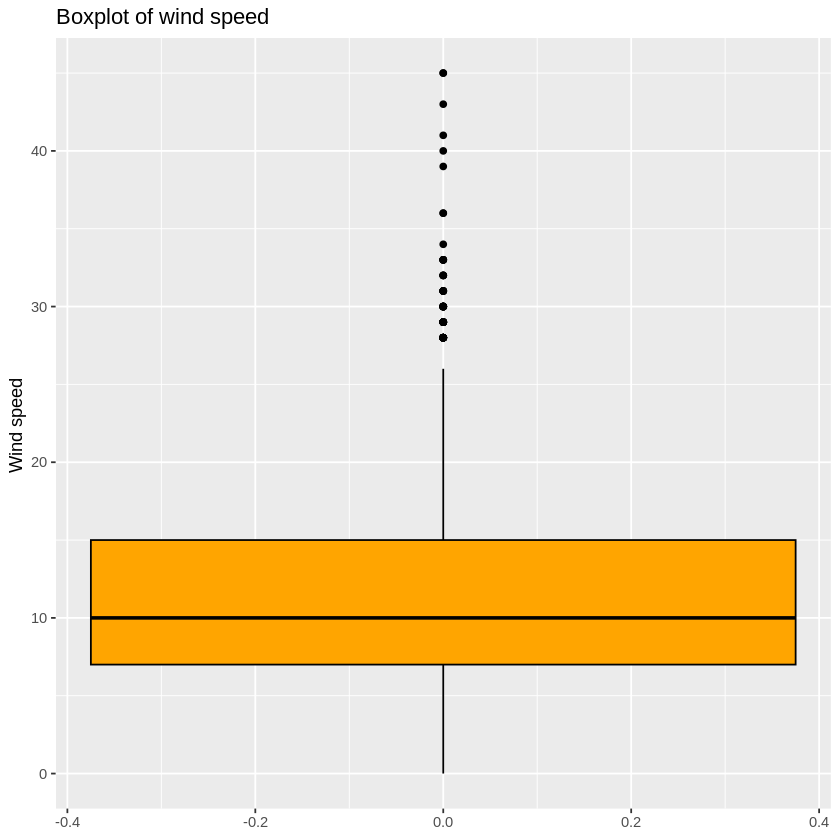

In [ ]:
ggplot(train_data , aes(y=HOURLYWindSpeed))+ geom_boxplot(fill="orange",color="black")+
  labs(title= "Boxplot of wind speed",y="Wind speed ")

The above boxplot highlights the variability of wind speed data, with a clear interquarlie range and a few outliers extending beyond the whiskers. It effectively showcases the range and distribution of wind speed observation

5.HOURLYStationPressure:
histogram of HOURLYStationPressure


Warning message:
“Removed 121 rows containing non-finite outside the scale range (`stat_bin()`).”


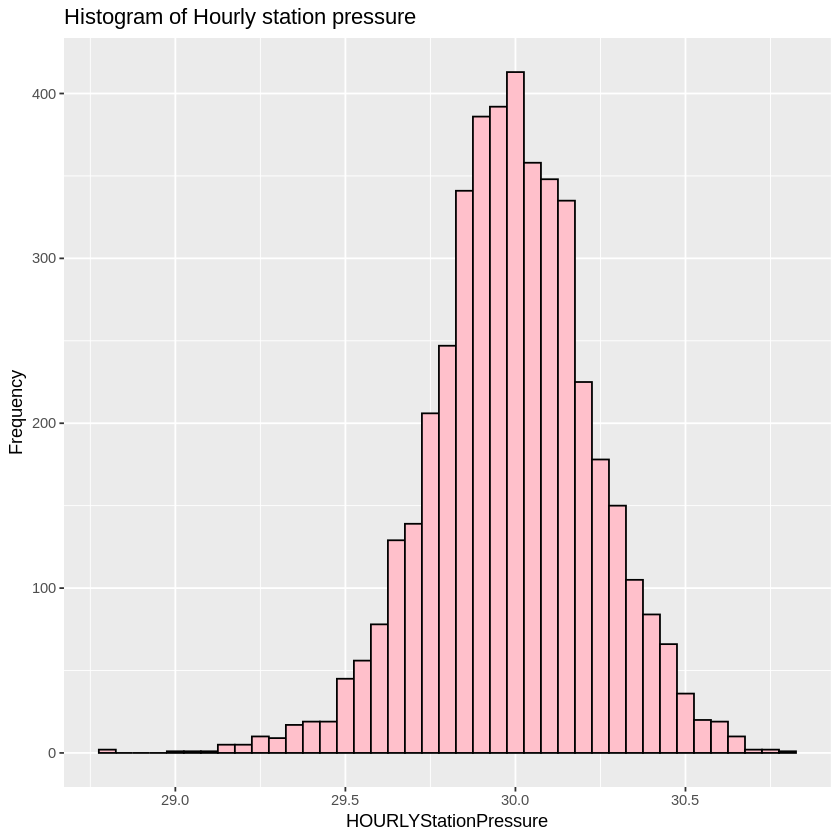

In [ ]:
ggplot(train_data, aes(x=HOURLYStationPressure)) + geom_histogram(binwidth = 0.05,fill = "pink",color="black")+
  labs(title = "Histogram of Hourly station pressure ", x= "HOURLYStationPressure",y="Frequency")

The above histogram of hourly station pressure data reveals a right-skewed-distribution, indicating a higher frequency of lower pressure values. This suggests that most of the hourly station pressure observations fall within the lower range

**MODEL EVAUATION AND VISUALISATION :**

Creating simple linear regression models where precip is the response variable and each of the value in key_column or a total of four simple models

In [ ]:
library(ggplot2)

In [ ]:
library(tidyverse)

In [ ]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



# MODELS EVALUATION

In [ ]:
lm_spec <- linear_reg() %>%
set_engine(engine="lm")

In [ ]:
model1<-lm_spec%>%
fit(HOURLYPrecip ~ HOURLYRelativeHumidity,data=train_data)
model1

parsnip model object


Call:
stats::lm(formula = HOURLYPrecip ~ HOURLYRelativeHumidity, data = data)

Coefficients:
           (Intercept)  HOURLYRelativeHumidity  
            -0.0242360               0.0004897  


From the model output, the coefficient for HOURLYRelativeHumidity is positive but very small (0.0004897), indicating a slight positive relationship between relative humidity and precipitation. The intercept is negative, suggesting that when humidity is zero, the model predicts a small negative precipitation value, though it may not be practically significant.

Visualisation of the above model :

In [ ]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1655 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1655 rows containing missing values or values outside the scale range
(`geom_point()`).”


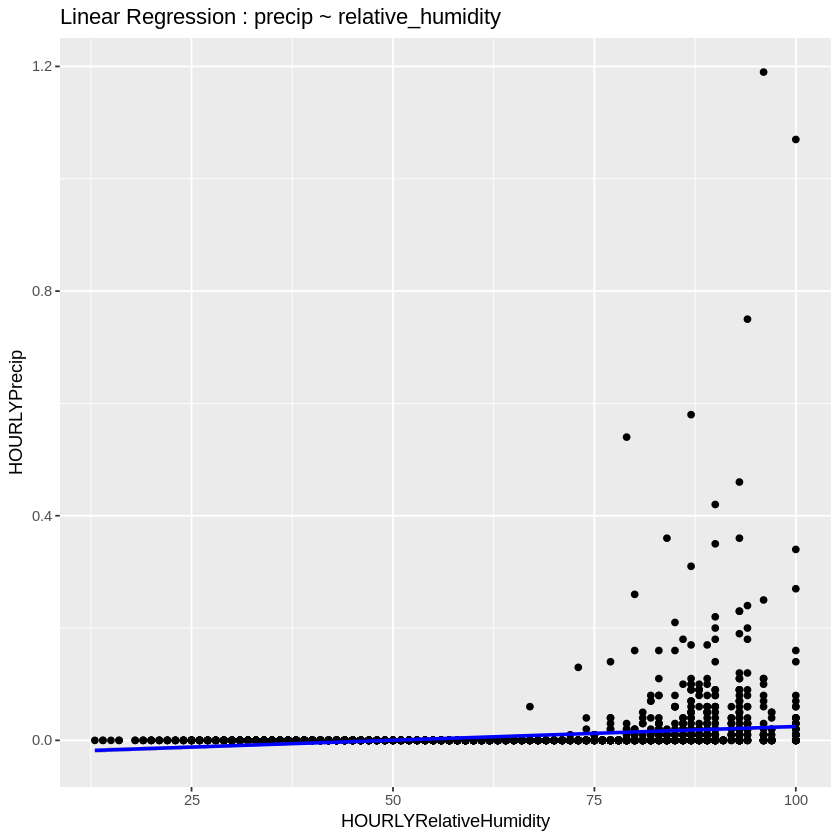

In [ ]:
ggplot(train_data , aes(x=HOURLYRelativeHumidity, y= HOURLYPrecip ))+geom_point()+
  geom_smooth(method="lm",col="blue")+
  labs(title= "Linear Regression : precip ~ relative_humidity")

**MODEL2 - **
(precip and dry_bulb_temp)

In [ ]:
model2 <- lm_spec %>%
fit(HOURLYPrecip ~ HOURLYDRYBULBTEMPF, data= train_data)
model2

parsnip model object


Call:
stats::lm(formula = HOURLYPrecip ~ HOURLYDRYBULBTEMPF, data = data)

Coefficients:
       (Intercept)  HOURLYDRYBULBTEMPF  
         5.737e-03           2.665e-05  


in simpler terms, the model indicates a very slight positive relationship between dry bulb temperature and precipitation

Here's the visualisation of the above model

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1655 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1655 rows containing missing values or values outside the scale range
(`geom_point()`).”


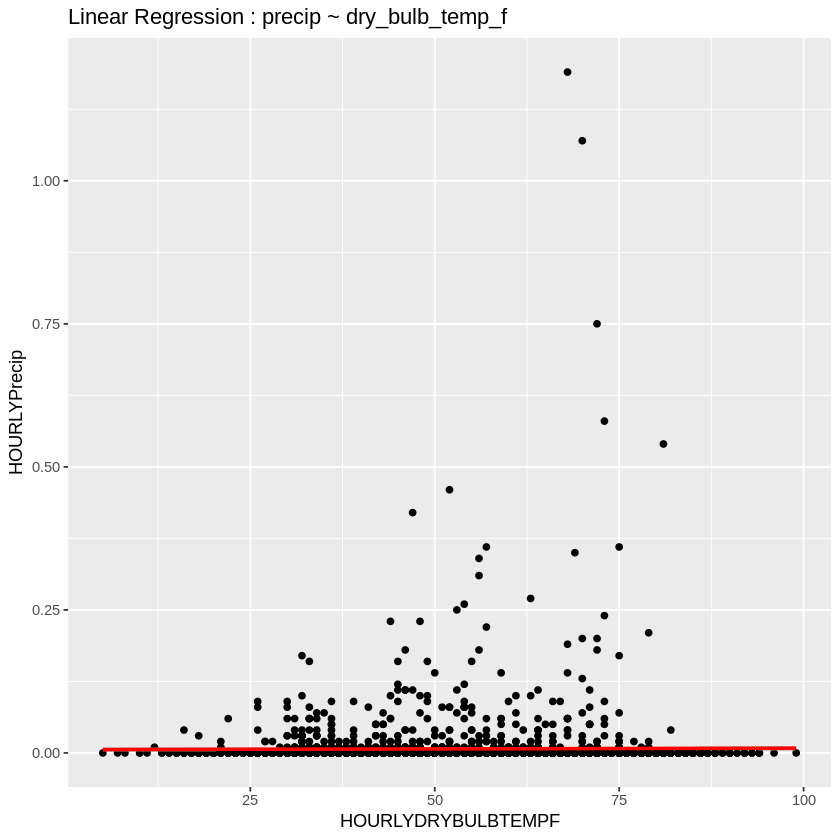

In [ ]:
ggplot(train_data , aes(x=HOURLYDRYBULBTEMPF , y= HOURLYPrecip ))+geom_point()+
  geom_smooth(method="lm",col="red")+
  labs(title= "Linear Regression : precip ~ dry_bulb_temp_f ")

**MODEL - 3 : **
(precip ~ wind_speed)

In [ ]:
model3 <- lm_spec %>%
fit(HOURLYPrecip ~ HOURLYWindSpeed, data = train_data)
model3

parsnip model object


Call:
stats::lm(formula = HOURLYPrecip ~ HOURLYWindSpeed, data = data)

Coefficients:
    (Intercept)  HOURLYWindSpeed  
      0.0023288        0.0004367  


there is a slight positive relationship between wind speed and precipitation, indicating that as wind speed increases, precipitation increases slightly as well

Visualisation of the above model

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1655 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1655 rows containing missing values or values outside the scale range
(`geom_point()`).”


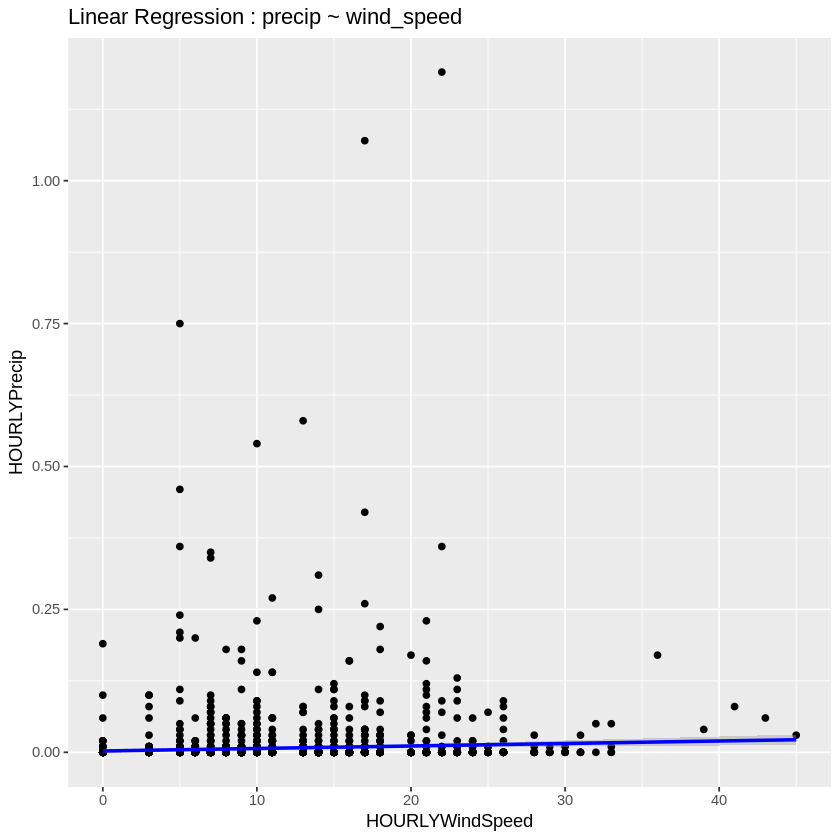

In [ ]:
ggplot(train_data , aes(x= HOURLYWindSpeed , y= HOURLYPrecip ))+geom_point()+
  geom_smooth(method= "lm", col="blue")+
  labs(title = "Linear Regression : precip ~ wind_speed")

**MODEL-4 :**
(precip~ HOURLYStationpressure)

In [ ]:
model4 <- lm_spec %>%
fit(HOURLYPrecip ~ HOURLYStationPressure , data = train_data)
model4

parsnip model object


Call:
stats::lm(formula = HOURLYPrecip ~ HOURLYStationPressure, data = data)

Coefficients:
          (Intercept)  HOURLYStationPressure  
              0.82060               -0.02711  


The model shows a slight negative relationship between station pressure and precipitation. As the station pressure increases, the precipitation tends to decrease. A negative relationship that seems pretty logical in the world of meteorology!

The visualisation of the above model is shown below

Warning message in geom_smooth(model = "lm", col = "blue"):
“Ignoring unknown parameters: `model`”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1658 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1658 rows containing missing values or values outside the scale range
(`geom_point()`).”


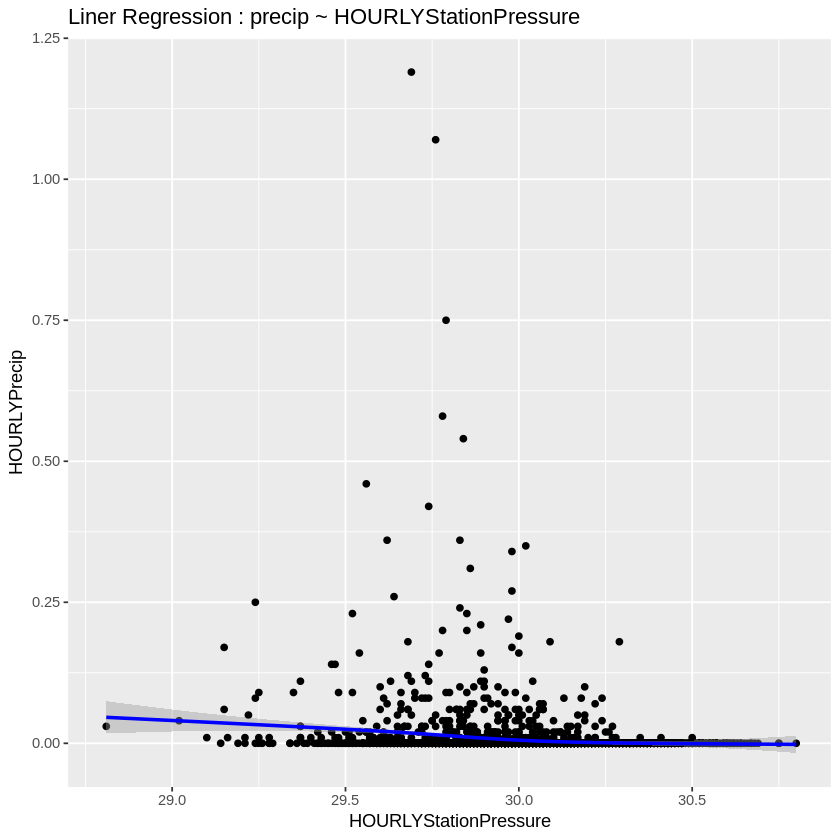

In [ ]:
ggplot(train_data , aes(x= HOURLYStationPressure, y= HOURLYPrecip))+geom_point()+
  geom_smooth(model="lm", col="blue")+
  labs(title= "Liner Regression : precip ~ HOURLYStationPressure")

#IMPROVING THE MODEL

ADDING MORE PREDICTORS_- Combining multiple predictors into one model to see if it improves performance

In [ ]:
model_combined<- lm_spec %>%
  fit(HOURLYPrecip~ HOURLYRelativeHumidity + HOURLYWindSpeed+HOURLYStationPressure, data = train_data)
model_combined

parsnip model object


Call:
stats::lm(formula = HOURLYPrecip ~ HOURLYRelativeHumidity + HOURLYWindSpeed + 
    HOURLYStationPressure, data = data)

Coefficients:
           (Intercept)  HOURLYRelativeHumidity         HOURLYWindSpeed  
             0.3356499               0.0005165               0.0007396  
 HOURLYStationPressure  
            -0.0123272  


1. **HOURLYDRYBULBTEMPF Model**: There's a very slight positive relationship between dry bulb temperature and precipitation. As the temperature increases, precipitation increases slightly.

2. **HOURLYWindSpeed Model**: There's a slight positive relationship between wind speed and precipitation. As the wind speed increases, so does precipitation.

3. **HOURLYStationPressure Model**: There's a slight negative relationship between station pressure and precipitation. As the pressure increases, precipitation decreases. This one aligns well with meteorological principles where higher pressure typically means clearer skies.

4. **HOURLYRelativeHumidity Model**: There's a positive relationship between relative humidity and precipitation. Higher humidity generally means more precipitation.

**Conclusion:** Among these, the model using HOURLYRelativeHumidity seems most intuitive and practical for predicting precipitation. It aligns with the natural expectation that higher humidity leads to more rain.
